In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('ВДО.xlsx',sheet_name=0, header=0, index_col=0)#, encoding='utf-8')
df = df.reset_index()
df = df.drop_duplicates()


# Меняем тип данных на удобный
df['Объем эмиссии'] = df['Объем эмиссии'].apply(lambda x: x.replace(',', '')).astype('int64') / 1000000

df['Купон (%)'] = df['Купон'].apply(lambda x: x[:-1]).astype('float64')
df.drop(['Купон'], axis=1, inplace=True)

# Создаем срок погашения бумаг в днях
df['Срок'] = df['Погашение'] - df['Размещение']
df['Срок'] = df['Срок'].astype('str').apply(lambda x: int(x[:-5]))

# Удаляем лишние столбцы
df = df[df['Для квалов'].isnull() == True]
df.drop(['Для квалов'], axis=1, inplace=True)

df = df[df['Комментарий'].isnull() == True]
df.drop(['Комментарий'], axis=1, inplace=True)
df.drop(['ISIN'], axis=1, inplace=True)


df.head()

,Эмитент,Номер,Тикер,Сектор,Организатор,Организатор.1,Организатор.2,Размещение,Погашение,Оферта,Объем эмиссии,Выплата купона,Рейтинг,Агентство,Купон (%),Срок
0,ФПК Гарант-Инвест,001Р-05,ГарИнв1P05,Девелопмент,БКС,-,-,2019-03-12,2024-04-05,Амортизация,6000.0,4 раза в год,ВВВ.ru,НКР,12.00,1851
1,МСБ-Лизинг 2,002Р-02,МСБЛиз2P02,Лизинг,Иволга,NaN,NaN,2019-05-27,2024-04-30,Амортизация,200.0,12 раз в год,BBB-(RU),АКРА,12.75,1800
2,ГУП ЖКХ РС(Я),БО-01,ЖКХРСЯ БО1,ЖКХ,БКС,Велес,-,2019-08-06,2026-07-28,3 года,3000.0,4 раза в год,ruBBB,Эксперт РА,12.50,2548
3,ПР-Лизинг 3,001Р-03,ПР-Лиз 1P3,Лизинг,Уралсиб,NaN,NaN,2019-08-13,2026-07-07,30 мес,400.0,12 раз в год,BBB+(RU),АКРА,12.00,2520
4,Кировский Завод,1,КировЗд1Р1,Производство,АБ Россия,-,-,2020-06-09,2025-06-03,1 год,1000.0,4 раза в год,BBB-(RU),АКРА,10.20,1820


### Поработаем с рейтингами

In [9]:
def rate(x):
    n = ['ru', '.', '(', ')', '/', '|', 'RU']
    for i in n:
        if i in x:
            x = x.replace(i, '')
    q = {'BB+BBB-':'BB+', 'A-BBB+':'BBB+', 'BBBBBB':'BBB', 'BB+BB':'BB', 'BBBBBB+':'BBB', 'A-  A-':'A-',
        'A+  A+':'A+', 'BBB+  BBB+':'BBB+', 'BBB+ B-':'BBB+', 'А-  B-':'B-', 'BBB+A-':'BBB+', 'А-  B+':'B+',
        'A-  BBB+':'BBB+', 'BBB+BBB':'BBB', 'BBB-BBB':'BBB-', 'BBBBBB-':'BBB-', 'A  A':'A', 'ВВВ': 'BBB'}
    for i in q:
        if x == i:
            x = q[i]
    return x


df['Рейтинг'] = df['Рейтинг'].astype('str').apply(lambda x: rate(x))
df['Рейтинг'].value_counts().sort_values(ascending=False)

#Убрать бумаги, где нет рейтинга
df = df[df['Рейтинг'].isnull() == False]
df = df[~(df['Рейтинг'] == 'nan')]

In [10]:
df['Рейтинг'].value_counts()

Рейтинг
BB+     45
BBB+    38
BBB     30
BB      27
B+      24
BBB-    22
BB-     21
A-      17
B       15
B-       9
A        9
А-       7
A+       6
Name: count, dtype: int64

### Посмотрим немного информации

In [25]:
df.groupby('Рейтинг')[['Купон (%)']].mean(
).round(2).sort_values('Купон (%)', ascending=False).head(10)

,Купон (%)
Рейтинг,
BB-,16.36
B,16.24
BB,15.91
B-,15.14
B+,15.00
BB+,13.66
BBB,12.89
BBB-,12.74
A+,12.12


In [26]:
df['Выплата купона'].value_counts()

Выплата купона
4 раза в год    163
12 раз в год     79
2 раза в год     25
6 раз в год       2
5 раза в год      1
Name: count, dtype: int64

### Визуализация

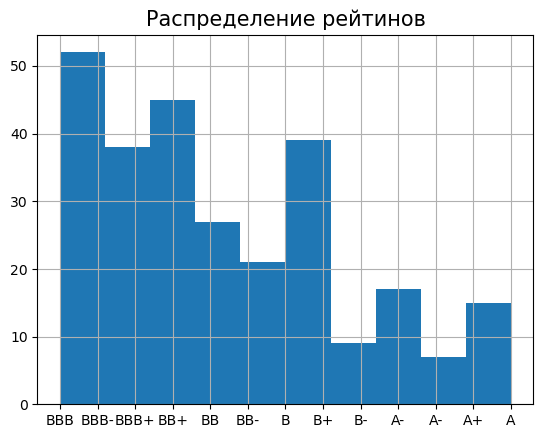

In [11]:
df['Рейтинг'].hist()
plt.title('Распределение рейтинов', fontsize=15);

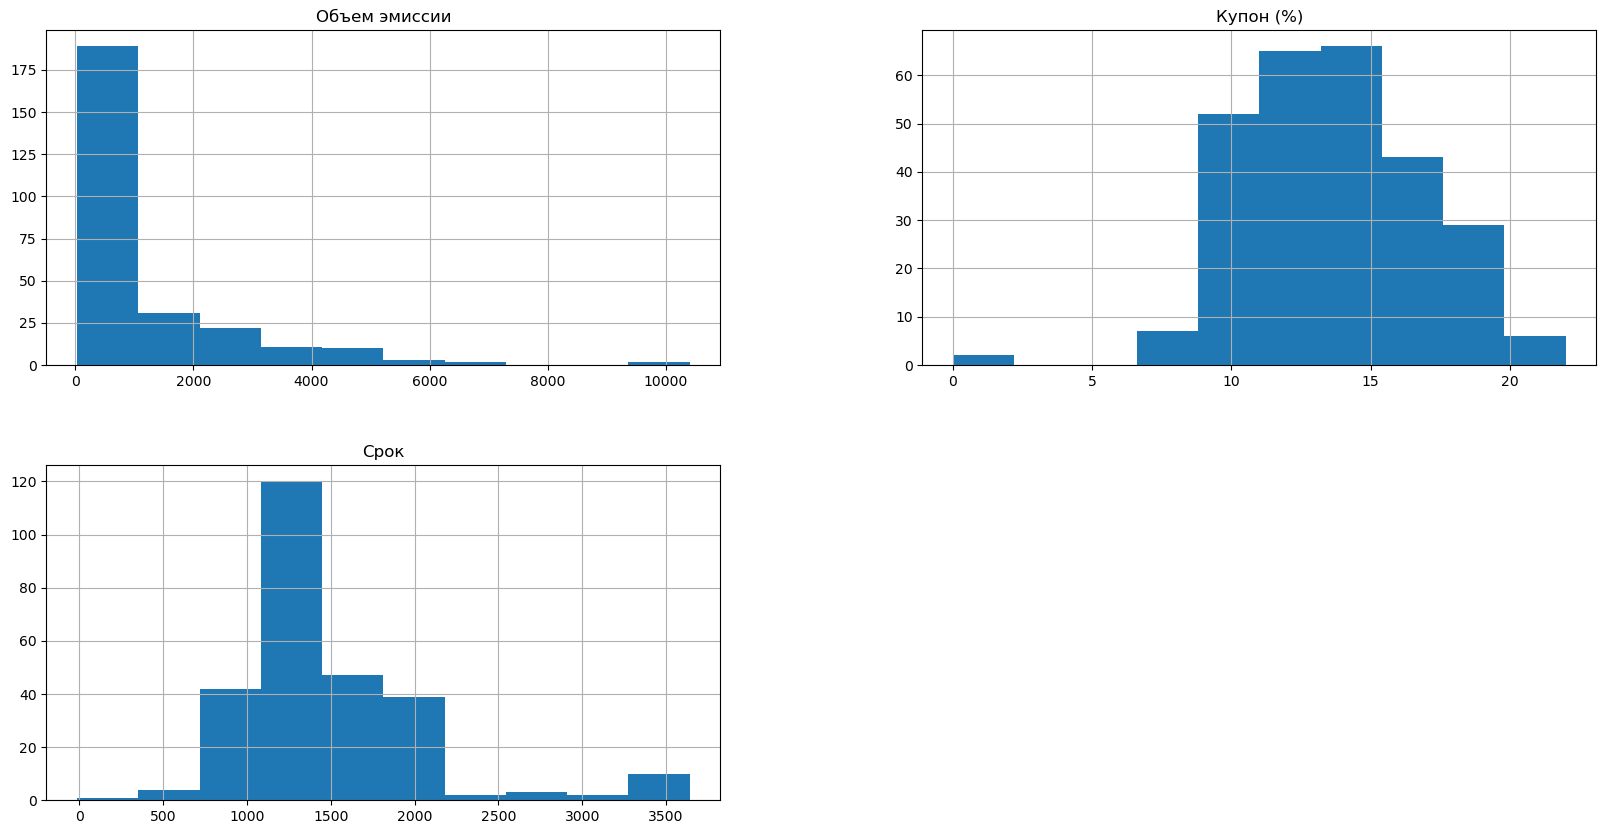

In [19]:
ndf = df.select_dtypes(include=["number"])
ndf.hist(figsize=(20,10));

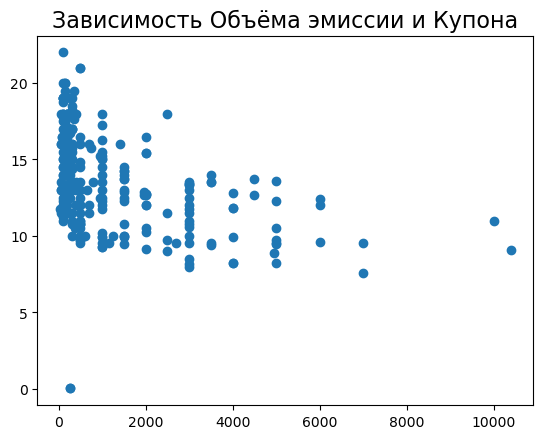

In [22]:
plt.scatter(x=df['Объем эмиссии'], y=df['Купон (%)'])
plt.title("Зависимость Объёма эмиссии и Купона", fontsize=16);